In [2]:
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import seaborn as sns
import sys
sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline

In [4]:
df = pd.read_excel('location of file')

In [5]:
df

,Price,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags
0,25089,AUDI,100,2016,Jeep,Petrol,3.0,70782,6,Automatic,4x4,Black,12
1,10192,BMW,114,2018,Sedan,Petrol,2.0,38282,4,Automatic,4x4,White,12
2,8500,BMW,116,2008,Hatchback,Petrol,1.6,11111,2,Automatic,Rear,Red,6
3,18817,BMW,118,2010,Sedan,Diesel,2.0,197000,4,Manual,Front,Black,0
4,21012,BMW,128,2009,Coupe,Petrol,3.0,198000,6,Tiptronic,Rear,White,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9635,3450,TOYOTA,Yaris,2017,Hatchback,Petrol,1.5,67357,4,Automatic,Front,White,12
9636,3058,TOYOTA,Yaris,2017,Sedan,Petrol,1.5,102322,4,Automatic,Front,White,12
9637,3058,TOYOTA,Yaris,2017,Sedan,Petrol,1.5,102322,4,Automatic,Front,White,12
9638,12231,TOYOTA,Yaris,2012,Hatchback,Petrol,1.5,136640,4,Automatic,Front,White,8


In [6]:
df.dtypes

Price              int64
Manufacturer      object
Model             object
Prod. year         int64
Category          object
Fuel type         object
Engine volume    float64
Mileage            int64
Cylinders          int64
Gear box type     object
Drive wheels      object
Color             object
Airbags            int64
dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution')

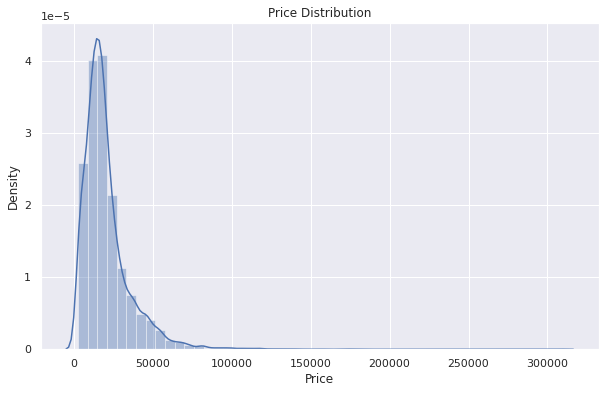

In [7]:
# Price disctribution

plt.figure(figsize=(10,6))
sns.distplot(df['Price']).set_title('Price Distribution')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Mileage Distribution')

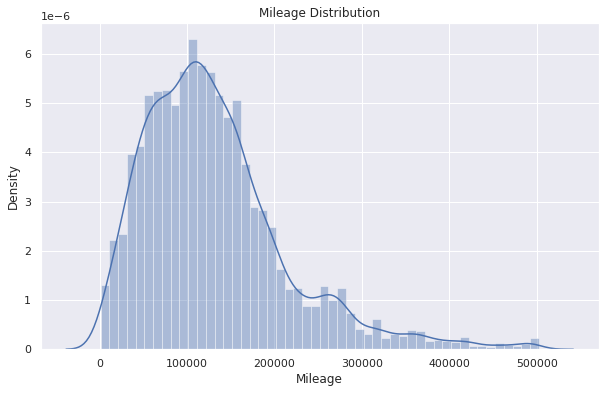

In [8]:
# Mileage disctribution

plt.figure(figsize=(10,6))
sns.distplot(df['Mileage']).set_title('Mileage Distribution')

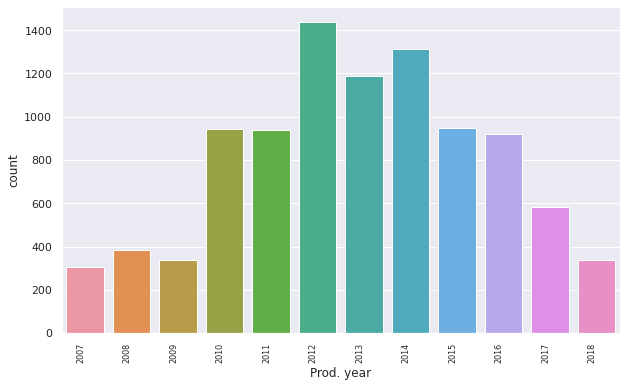

In [9]:
# Year distribution

plt.figure(figsize=(10,6))
yr = sns.countplot(x='Prod. year', data=df)
yr.set_xticklabels(yr.get_xticklabels(), rotation=90, ha="right",fontsize=8);

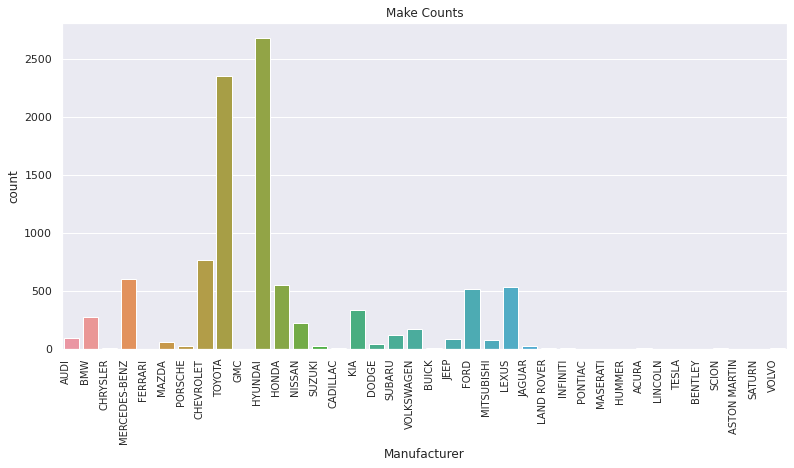

In [10]:
# Make distribution

plt.figure(figsize=(13,6))
plt.title('Make Counts')
yr = sns.countplot(x='Manufacturer', data=df)
yr.set_xticklabels(yr.get_xticklabels(), rotation=90, ha="right",fontsize=10);

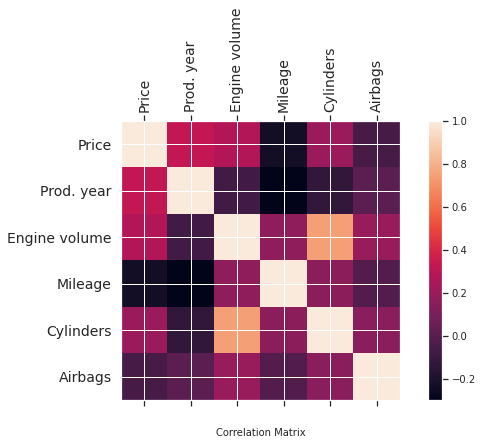

In [11]:
train_set_corr = df[['Price','Prod. year','Engine volume','Mileage','Cylinders','Airbags']]
# Plot Correlation Matrix
f = plt.figure(figsize=(10,5))
plt.matshow(train_set_corr.corr(), fignum=f.number)
plt.xticks(range(train_set_corr.shape[1]), train_set_corr.columns, fontsize=14, rotation=90)
plt.yticks(range(train_set_corr.shape[1]), train_set_corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10,y=-0.15);

In [190]:
# feature selection
X = df.drop(['Price','Model'],axis=1)
y = df[['Price']]

In [191]:
y

,Price
0,25089
1,10192
2,8500
3,18817
4,21012
...,...
9635,3450
9636,3058
9637,3058
9638,12231


In [192]:
categorical_cols =['Manufacturer','Category','Fuel type','Gear box type','Drive wheels','Color']

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(X[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=X.index, columns=ohe.get_feature_names())

#Extract only the columns that didnt need to be encoded
data_other_cols = X.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [193]:
data_out

,x0_ACURA,x0_ASTON MARTIN,x0_AUDI,x0_BENTLEY,x0_BMW,x0_BUICK,x0_CADILLAC,x0_CHEVROLET,x0_CHRYSLER,x0_DODGE,...,x5_Red,x5_Silver,x5_Sky blue,x5_White,x5_Yellow,Prod. year,Engine volume,Mileage,Cylinders,Airbags
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016,3.0,70782,6,12
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2018,2.0,38282,4,12
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2008,1.6,11111,2,6
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2010,2.0,197000,4,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2009,3.0,198000,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2017,1.5,67357,4,12
9636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2017,1.5,102322,4,12
9637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2017,1.5,102322,4,12
9638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2012,1.5,136640,4,8


In [194]:
from sklearn import preprocessing

data_out[['Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']] = \
                preprocessing.scale(data_out[['Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']])

In [348]:
data_out

,x0_ACURA,x0_ASTON MARTIN,x0_AUDI,x0_BENTLEY,x0_BMW,x0_BUICK,x0_CADILLAC,x0_CHEVROLET,x0_CHRYSLER,x0_DODGE,...,x5_Red,x5_Silver,x5_Sky blue,x5_White,x5_Yellow,Prod. year,Engine volume,Mileage,Cylinders,Airbags
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.155377,0.865499,-0.729308,1.411612,1.331523
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.893813,-0.305374,-1.123801,-0.420490,1.331523
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-1.798368,-0.773724,-1.453610,-2.252593,-0.135882
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.059931,-0.305374,0.802758,-0.420490,-1.603287
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-1.429150,0.865499,0.814897,1.411612,0.353253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.524595,-0.890811,-0.770881,-0.420490,1.331523
9636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.524595,-0.890811,-0.346467,-0.420490,1.331523
9637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.524595,-0.890811,-0.346467,-0.420490,1.331523
9638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-0.321495,-0.890811,0.070093,-0.420490,0.353253


In [198]:
from sklearn.model_selection import train_test_split
# splitting data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(data_out, y, test_size=0.2)

In [207]:
import torch

dtype = torch.float

X_train_tensor = torch.tensor(X_train.values, dtype = dtype)
x_test_tensor = torch.tensor(X_test.values, dtype = dtype)

Y_train_tensor = torch.tensor(y_train.values, dtype = dtype)
y_test_tensor = torch.tensor(y_test.values, dtype = dtype)

In [208]:
X_train_tensor.shape

torch.Size([7712, 82])

In [209]:
Y_train_tensor.shape

torch.Size([7712, 1])

In [297]:
inp = 82
out = 1

hid1 = 100

loss_fn = torch.nn.MSELoss()

learning_rate = 0.0000195

In [298]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid1),
                            torch.nn.ReLU(),
                            torch.nn.Linear(hid1, out),
)

In [314]:
hist_train = np.zeros(10000)
for iter in range(10000):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, Y_train_tensor)
    hist_train[iter] = loss
    if iter % 1000 ==0:
        print(iter, loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 188028032.0
1000 41987748.0
2000 39836036.0
3000 37581228.0
4000 37347204.0
5000 36775524.0
6000 35123664.0
7000 34904704.0
8000 33814436.0
9000 34426364.0


In [315]:
y_pred_tensor = model(x_test_tensor)

In [330]:
y_pred = y_pred_tensor.detach().numpy()

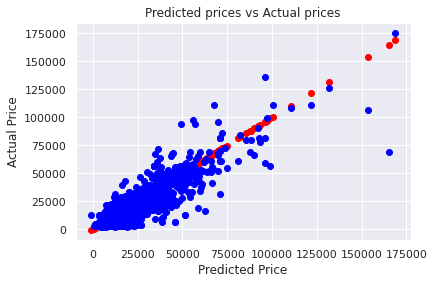

In [317]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_pred, color='red')
plt.scatter(y_pred, y_test.values, color='blue')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")

plt.title("Predicted prices vs Actual prices")
plt.show()

In [318]:
y_pred

array([[18374.01 ],
       [12384.901],
       [12472.63 ],
       ...,
       [23236.41 ],
       [26801.672],
       [58337.043]], dtype=float32)

In [319]:
from sklearn.metrics import r2_score
r2_score(y_test.values,y_pred)

0.7443173860331211

In [320]:
from sklearn import metrics
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_tensor, y_pred)))

RMSE:  7942.766


In [321]:
loss

tensor(33725036., grad_fn=<MseLossBackward0>)

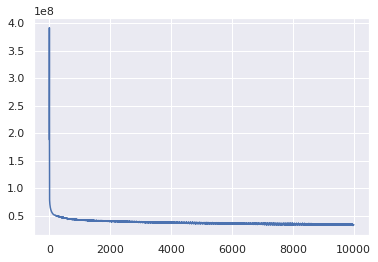

In [323]:
plt.plot(hist_train)

In [324]:
l1 = loss_fn(model(x_test_tensor),y_test_tensor)
#plt.plot(np.array(l1))
l1

tensor(63087528., grad_fn=<MseLossBackward0>)

In [344]:
hist_test = np.zeros(10000)
learning_rate = 0.00001
for iter in range(10000):
    y_pred_test = model(x_test_tensor)
    loss_test = loss_fn(y_pred_test, y_test_tensor)
    hist_test[iter] = loss_test
    if iter % 1000 ==0:
        print(iter, loss_test.item())
    
    model.zero_grad()
    loss_test.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 12084610.0
1000 10083051.0
2000 9991052.0
3000 9915460.0
4000 9847399.0
5000 9786531.0
6000 9728666.0
7000 9678255.0
8000 9630291.0
9000 9581595.0


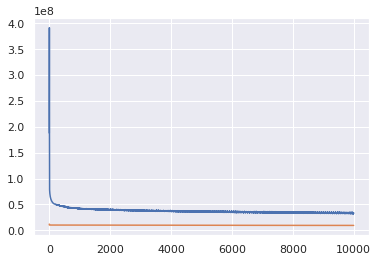

In [347]:
plt.plot(hist_train)
plt.plot(hist_test)